## Phase 1: Data Inspection & Structural Audit

Before plotting, you must understand the "skeleton" of your data.

- **Load & Glimpse:** Import the data using Pandas. Display the first 10 rows and use `.info()` to identify column names and data types.

- **Variable Categorization:** Create two lists: `numerical_features` and `categorical_features`.

- **The Target Variable:** Perform a univariate analysis on `SalePrice`.  
  - Calculate mean, median, skewness, and kurtosis.  
  - **Task:** Plot a histogram and a Q-Q plot. Does it follow a normal distribution? If not, apply a log transformation.


Phase 1: Data Inspection & Structural Audit

Load & Glimpse:

In [2]:
import pandas as pd


In [3]:
df= pd.read_csv("data/train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   str    
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   str    
 6   Alley          91 non-null     str    
 7   LotShape       1460 non-null   str    
 8   LandContour    1460 non-null   str    
 9   Utilities      1460 non-null   str    
 10  LotConfig      1460 non-null   str    
 11  LandSlope      1460 non-null   str    
 12  Neighborhood   1460 non-null   str    
 13  Condition1     1460 non-null   str    
 14  Condition2     1460 non-null   str    
 15  BldgType       1460 non-null   str    
 16  HouseStyle     1460 non-null   str    
 17  OverallQual    1460 non-null   int64  
 18  OverallCond    1460

Variable Categorization:

In [5]:
# int64 and float64 → numerical | Numerical → statistics + histograms
# object → categorical | Categorical → counts + bar plots
numerial_features= df.select_dtypes(include=['int64','float64']).columns.tolist()
print(numerial_features)
print("Numerical:", len(numerial_features))
categorial_features= df.select_dtypes(include=['str']).columns.tolist()
print(categorial_features)
print("Categorical:", len(categorial_features))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Numerical: 38
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'Garage

The Target Variable:

In [6]:
# Mean → average price
# Median → middle price
# Skewness → direction of skew
# Kurtosis → outlier heaviness
print("Mean:", df['SalePrice'].mean())
print("Median:", df['SalePrice'].median())
print("Skewness:", df['SalePrice'].skew())
print("Kurtosis:", df.SalePrice.kurt())

Mean: 180921.19589041095
Median: 163000.0
Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


Task: Plot a histogram and a Q-Q plot. Does it follow a normal distribution? If not, apply a log
transformation.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

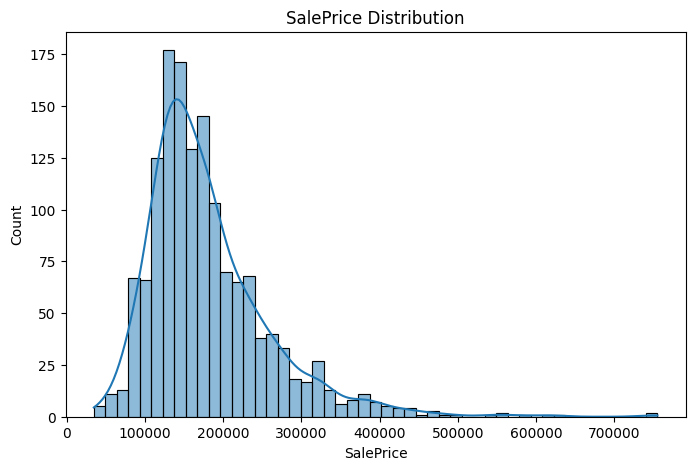

In [8]:
#Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'],kde=True)
plt.title("SalePrice Distribution")
plt.show()

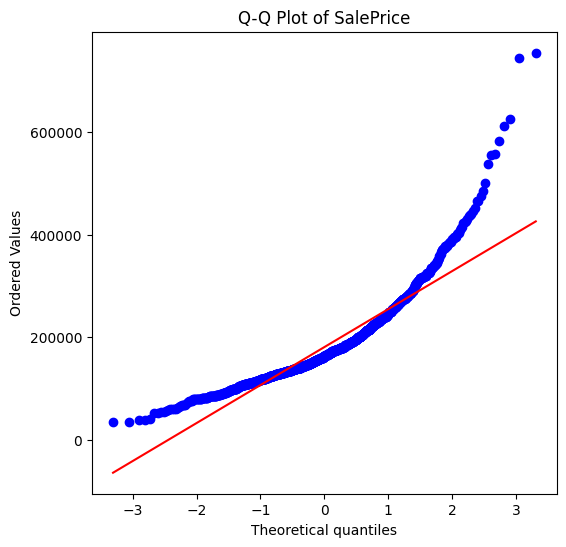

In [9]:
#Q-Q Plot
plt.figure(figsize=(6,6))
stats.probplot(df['SalePrice'], dist='norm', plot=plt)
plt.title('Q-Q Plot of SalePrice')
plt.show()

1. Does histogram have long right tail? YES
2️. Is Q-Q plot curved at ends? YES
- SalePrice is not normally distributed
- It is positively skewed with heavy tails
- Log transformation is recommended

Log transform: Compresses large values, Reduces skewness, Makes distribution more symmetric and Improves regression performance

In [ ]:
import numpy as np

df['SalePrice_log'] = np.log1p(df['SalePrice'])

print("New Skewness:", df['SalePrice_log'].skew())
print("New Kurtosis:", df['SalePrice_log'].kurt())

# Log transformation reduced skewness from 1.88 to ~0.12,
# making the distribution approximately symmetric.
# Kurtosis dropped from 6.53 to ~0.81, indicating fewer extreme outliers.
# Overall, SalePrice is now closer to normal distribution,
# which improves suitability for regression modeling.



New Skewness: 0.12134661989685333
New Kurtosis: 0.809519155707878


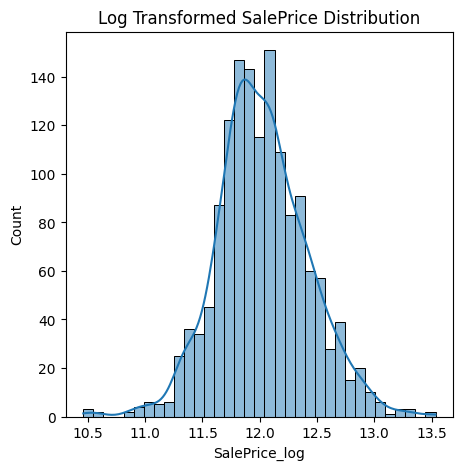

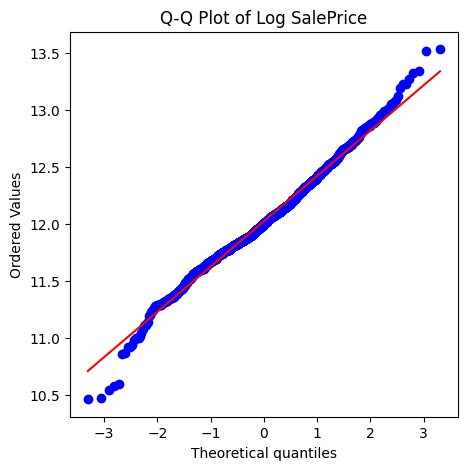

In [14]:
# Histogram of log transformed target
plt.figure(figsize=(5,5))
sns.histplot(df['SalePrice_log'], kde=True)
plt.title("Log Transformed SalePrice Distribution")
plt.show()

# Q-Q plot
plt.figure(figsize=(5,5))
stats.probplot(df['SalePrice_log'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log SalePrice")
plt.show()

# Phase 1 Conclusion:
# The dataset contains 1460 records with mixed numerical and categorical features.
# SalePrice was highly right-skewed with outliers.
# Log transformation normalized the distribution, improving suitability for regression.


## Phase 2: The "Cleaning" Ritual

Instead of guessing which points are outliers, we use the **Interquartile Range (IQR)**.

---

### 📊 The Calculation

1. Calculate **Q1 (25th percentile)** and **Q3 (75th percentile)** for `SalePrice`.
2. Find the **IQR**: IQR = Q3 - Q1
3. Define the bounds:

- **Lower Bound:**  
  ```
  Q1 - 1.5 × IQR
  ```

- **Upper Bound:**  
  ```
  Q3 + 1.5 × IQR
  ```

---

### 🧹 The Task

Filter your dataframe to keep only the rows where `SalePrice` falls **between the lower and upper bounds**.

---

### 📈 Visualization

Create a **Boxplot before and after** this process to show how the:

- **Whiskers** change
- **Fliers (outlier dots)** are reduced or removed

This visually confirms that extreme outliers have been cleaned from the dataset.

---




In [15]:
# --- IQR outlier thresholds for SalePrice ---
Q1 = df['SalePrice'].quantile(0.25)     # 25th percentile
Q3 = df['SalePrice'].quantile(0.75)     # 75th percentile
IQR = Q3 - Q1                           # middle 50% spread

lower_bound = Q1 - 1.5 * IQR            # low outlier cutoff
upper_bound = Q3 + 1.5 * IQR            # high outlier cutoff

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Q1: 129975.0
Q3: 214000.0
IQR: 84025.0
Lower Bound: 3937.5
Upper Bound: 340037.5


In [16]:
# --- Filter dataframe to remove outliers ---
df_clean = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]

# check how many rows removed
print("Original rows:", df.shape[0])
print("Cleaned rows:", df_clean.shape[0])
print("Removed rows:", df.shape[0] - df_clean.shape[0])


Original rows: 1460
Cleaned rows: 1399
Removed rows: 61


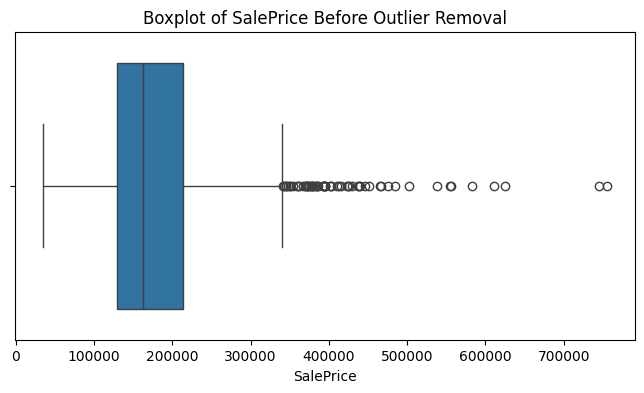

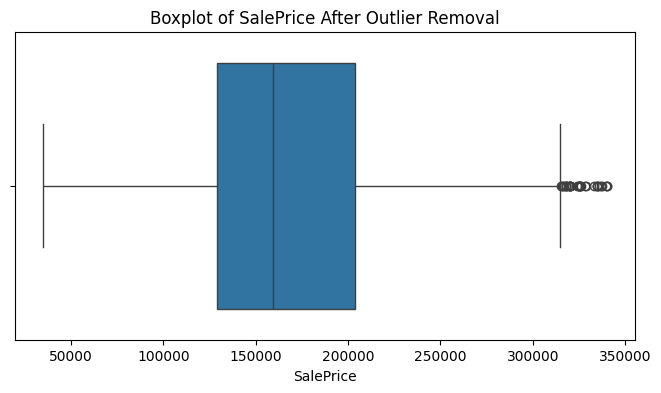

In [ ]:
# --- Boxplot BEFORE cleaning ---
plt.figure(figsize=(8,4))
sns.boxplot(x=df['SalePrice'])
plt.title("Boxplot of SalePrice Before Outlier Removal")
plt.show()

# --- Boxplot AFTER cleaning ---
plt.figure(figsize=(8,4))
sns.boxplot(x=df_clean['SalePrice'])
plt.title("Boxplot of SalePrice After Outlier Removal")
plt.show()

# Phase 2 Conclusion:
# Using the IQR method, 61 high-price outliers (~4.2%) were removed.
# After filtering, the distribution became more compact with shorter whiskers
# and fewer fliers, indicating reduced variability and a cleaner dataset.

## Phase 3: Multivariate Analysis & Visualization

This is the heart of EDA—finding how variables dance together.

- **Correlation Matrix:** Generate a heatmap of the correlation matrix.  
  - **Task:** Identify the top 10 features most strongly correlated with SalePrice (e.g., OverallQual, GrLivArea, GarageCars).

- **Categorical Deep-Dive:** Use boxplots to show the relationship between OverallQual (1–10 scale) and SalePrice.

- **Neighborhood Analysis:** Create a bar chart showing the average price per neighborhood. Which is the "Beverly Hills" of this dataset?


In [18]:
#Compute correlation matrix
# --- Correlation matrix for numerical features ---
corr_matrix = df_clean.corr(numeric_only=True)

corr_matrix.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_log
Id,1.000000,0.006703,0.003656,-0.015152,-0.016500,0.008625,-0.008484,-0.017613,-0.050156,-0.000520,...,0.004464,0.005792,-0.067449,0.008969,0.050732,-0.006998,0.023635,-0.007731,-0.011984,-0.005719
MSSubClass,0.006703,1.000000,-0.391839,-0.149714,0.066951,-0.070420,0.045599,0.055086,0.046659,-0.050465,...,0.000916,-0.014835,-0.047040,-0.034634,0.007317,-0.008994,-0.016176,-0.020555,-0.060111,-0.049203
LotFrontage,0.003656,-0.391839,1.000000,0.597008,0.199194,-0.042668,0.094842,0.062862,0.148463,0.214566,...,0.130389,0.011403,0.072894,0.041847,0.188574,0.009261,0.016261,0.009906,0.319597,0.315667
LotArea,-0.015152,-0.149714,0.597008,1.000000,0.070548,0.004398,0.001485,0.012715,0.091583,0.203555,...,0.102608,-0.009359,0.031653,0.042003,0.098440,0.050528,0.001886,-0.030297,0.249812,0.242337
OverallQual,-0.016500,0.066951,0.199194,0.070548,1.000000,-0.071040,0.561141,0.532226,0.326875,0.151949,...,0.289312,-0.106235,0.028345,0.053373,0.051284,-0.026519,0.073287,-0.022327,0.784294,0.782117


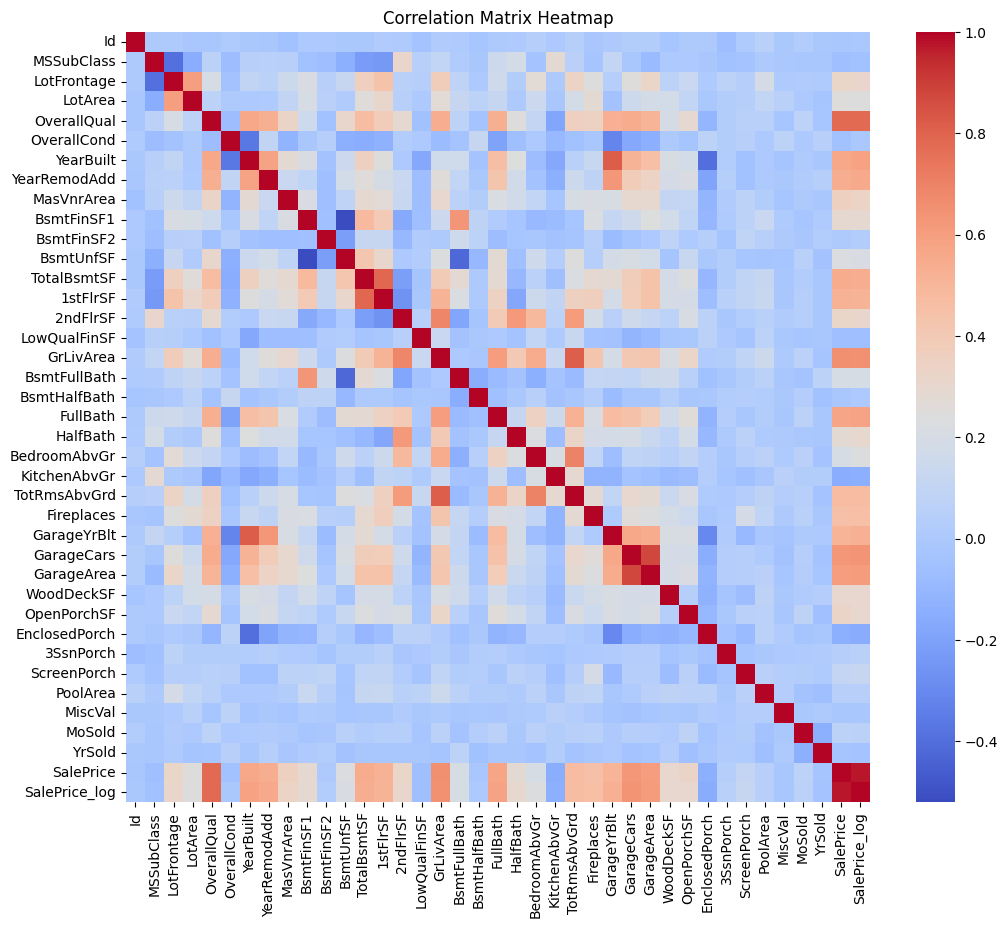

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# The correlation heatmap shows strong positive relationships between SalePrice
# and features like OverallQual, GrLivArea, and GarageCars, indicating that
# house quality, size, and amenities are key drivers of price.



🔴 Red → increases together
🔵 Blue → moves opposite
⚪ Light → weak/no relation

In [ ]:
# --- Correlation with SalePrice ---
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
# top 10 excluding SalePrice itself
top10= saleprice_corr[1:11]
print("Top 10 features most positively correlated with SalePrice:")
print(top10)
# OverallQual shows the strongest correlation with SalePrice,
# followed by living area, garage capacity, and house age.
# This indicates that quality, size, and amenities are key drivers of house value.


Top 10 features most positively correlated with SalePrice:
SalePrice_log    0.970421
OverallQual      0.784294
GrLivArea        0.661325
GarageCars       0.628013
GarageArea       0.607230
FullBath         0.577369
YearBuilt        0.564558
TotalBsmtSF      0.543508
YearRemodAdd     0.541161
1stFlrSF         0.522785
Name: SalePrice, dtype: float64


OverallQual vs SalePrice (Categorical deep dive)

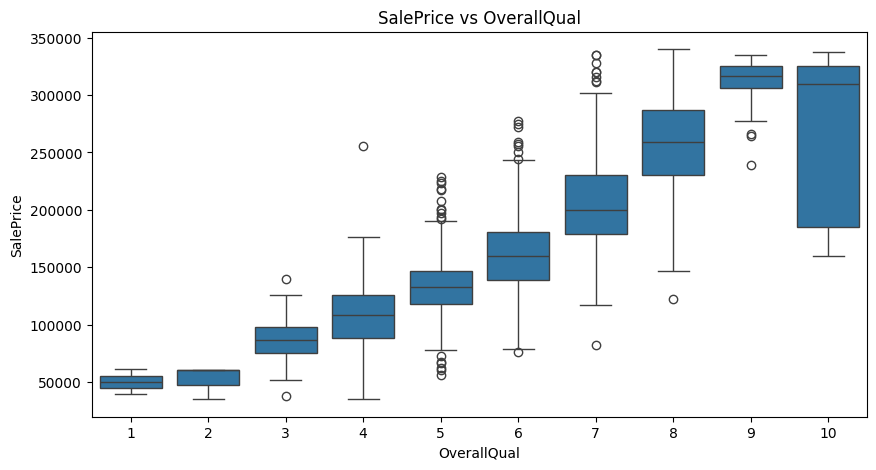

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean, x='OverallQual', y='SalePrice')
plt.title("SalePrice vs OverallQual")
plt.show()
# Median SalePrice increases consistently with OverallQual,
# showing a strong positive relationship between house quality and price.
# Higher quality levels also show greater price variability.


Neighborhood Analysis: Create a bar chart showing the average price per neighborhood. Which is the
"Beverly Hills" of this dataset?

In [26]:
df_clean.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
# Calculate average price per neighborhood
neigh_avg= df_clean.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
print("Average SalePrice by Neighborhood:") 
print(neigh_avg.head(10))

Average SalePrice by Neighborhood:
Neighborhood
NoRidge    282386.933333
NridgHt    260396.520000
StoneBr    239312.500000
Timber     230914.371429
Veenker    224150.000000
Somerst    221295.095238
ClearCr    212565.428571
Crawfor    200192.937500
CollgCr    195175.851351
Blmngtn    194870.882353
Name: SalePrice, dtype: float64


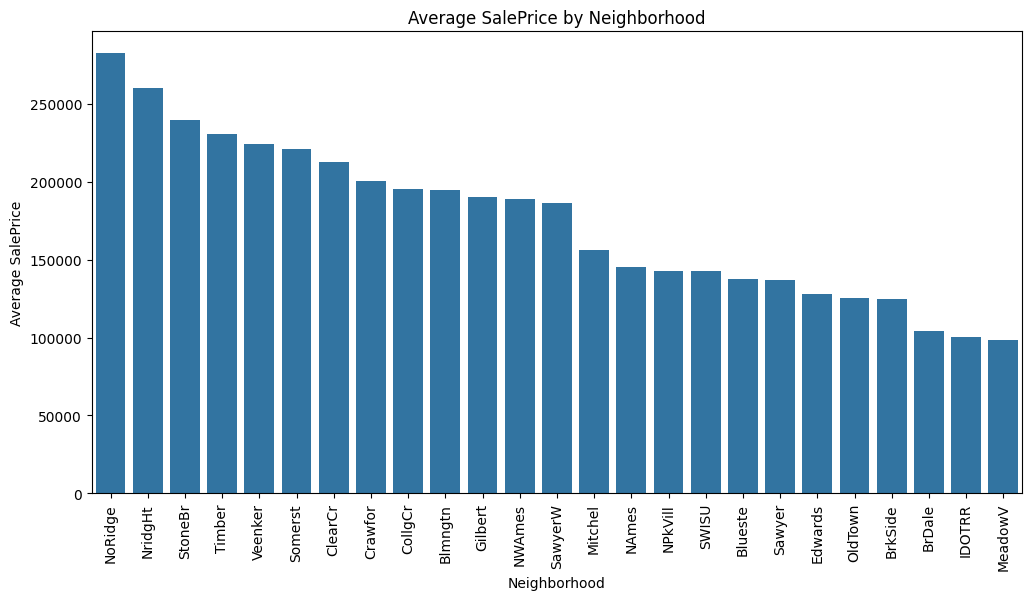

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=neigh_avg.index, y=neigh_avg.values)
plt.title("Average SalePrice by Neighborhood")
plt.ylabel("Average SalePrice")
plt.xticks(rotation=90)
plt.show()

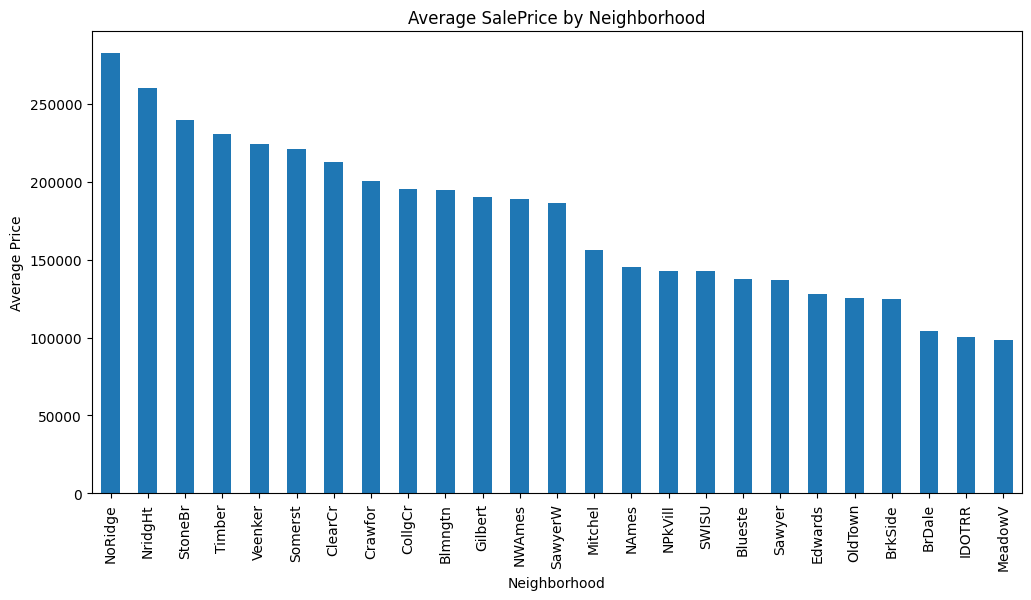

In [ ]:
plt.figure(figsize=(12,6))
neigh_avg.plot(kind='bar')
plt.title("Average SalePrice by Neighborhood")
plt.ylabel("Average Price")
plt.show()

# Phase 3 Conclusion:
# OverallQual, living area, and garage capacity show strong positive correlation with SalePrice.
# Higher quality homes have higher prices with greater variability.
# Neighborhood analysis shows NoRidge as the most expensive area,
# highlighting the importance of location in property valuation.

The neighborhood NoRidge has the highest average SalePrice, indicating it is the most premium area in the dataset with higher property values.

## Phase 4: Final Insights & Reporting

Summarize your findings in a "Managerial Report" format:

1. **Top 3 Drivers:** What are the three most important factors in determining a house's price?

2. **Anomaly Report:** Which features had the most missing data, and how might that affect a future model?

3. **Visual Summary:** Include your 4 most impactful charts.

# 📊 Unlocking Real Estate Value: Managerial Report

## 🧭 Executive Summary
This exploratory data analysis (EDA) examined the key factors influencing house prices using the Ames Housing dataset. Through data inspection, cleaning, transformation, and multivariate analysis, the main drivers of property value were identified. Overall, the results show that **construction quality, living space, and location** have the strongest impact on house prices.

---

## 🏆 1) Top 3 Drivers of House Prices

### 1. Overall Quality (OverallQual)
OverallQual is the strongest predictor of SalePrice. Homes with higher quality ratings consistently sell for higher prices, indicating buyers strongly value build quality and finishing standards.

### 2. Above Ground Living Area (GrLivArea)
GrLivArea has a strong positive relationship with SalePrice. Larger above-ground living space generally leads to higher home values, showing the importance of usable space.

### 3. Garage Capacity (GarageCars)
GarageCars is also strongly correlated with SalePrice. Properties with greater garage capacity tend to be more expensive, reflecting the value of convenience and functionality.

---

## ⚠️ 2) Anomaly Report: Missing Data Insights
The features with the most missing values include:

- **PoolQC**
- **MiscFeature**
- **Alley**
- **Fence**
- **FireplaceQu**
- **LotFrontage**

In many cases, missing values likely indicate the **absence of the feature** (e.g., missing PoolQC often means *no pool*). For future modeling, these features must be handled carefully through **imputation and/or encoding** to avoid bias and maintain predictive accuracy.

---

## 📈 3) Visual Summary: 4 Most Impactful Charts

1. **SalePrice Distribution (Histogram + Q-Q Plot)**
   - SalePrice was right-skewed and not normally distributed.
   - A log transformation produced a distribution closer to normal, improving modeling suitability.

2. **Outlier Removal (Boxplot Before vs After IQR Filtering)**
   - IQR-based filtering removed extreme SalePrice outliers and reduced variability, shrinking whiskers and fliers.

3. **Correlation Heatmap**
   - Strong positive correlations were observed between SalePrice and **OverallQual, GrLivArea, and GarageCars**, identifying the most influential numeric drivers.

4. **Neighborhood Average Price (Bar Chart)**
   - **NoRidge** had the highest average SalePrice, making it the dataset’s “Beverly Hills” and highlighting the importance of location.

---

## ✅ Conclusion
House prices in this dataset are primarily driven by **quality (OverallQual)**, **size (GrLivArea)**, and **amenities (GarageCars)**, while **location (Neighborhood)** also plays a major role. Future modeling efforts should prioritize these drivers and handle missing data features carefully to ensure reliable predictions.